In [508]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt

In [509]:
from qucat import Network,GUI,L,J,C,R

In [510]:
cir = Network([
C(0,1,68.67e-15), # transmon 1
J(0,1,'Lj'),
C(1,3,60e-15), # coupling capacitor 1
C(0,2,63e-15), # transmon 2
J(0,2,8e-9),
C(2,3,60e-15), # coupling capacitor 2
#C(2,3,0.5e-15), # ext. coupl. cap.
R(3,0,50) # 50 Ohm load
]) 

In [511]:
cir = Network([
C(0,1,100e-15), # transmon
J(0,1,'Lj'),
C(0,2,100e-15), # resonator
L(0,2,10e-9),
C(1,2,1e-15), # coupling capacitor
C(2,3,0.5e-15), # ext. coupl. cap.
R(3,0,50)]) # 50 Ohm load



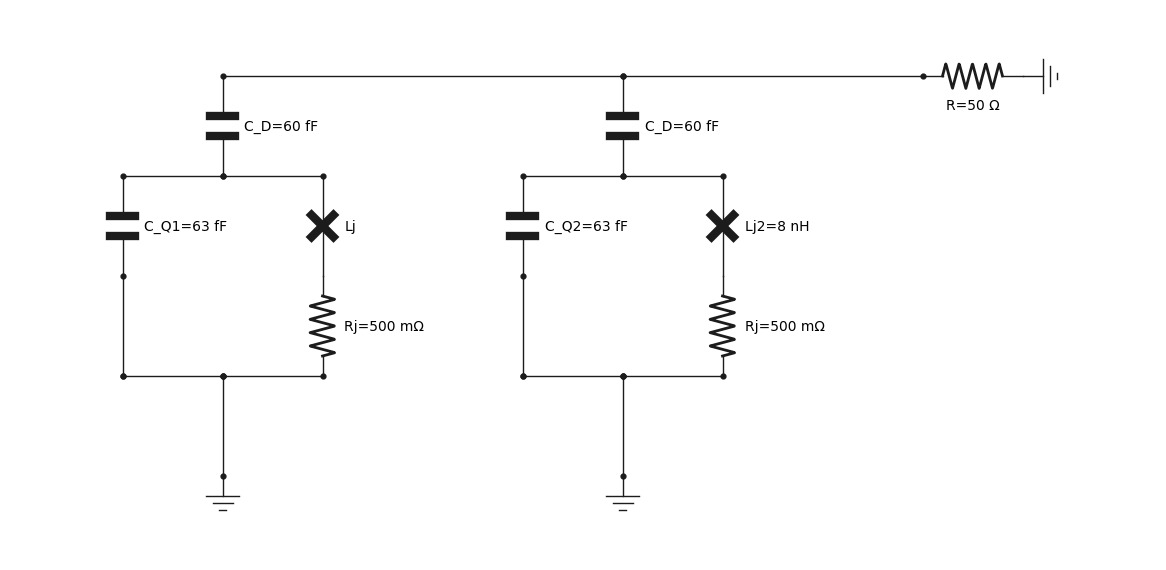

C 0 3 C_D=60 fF
C 0 1 C_Q1=63 fF
C 2 3 C_D=60 fF
J 0 4 Lj
C 1 2 C_Q2=63 fF
J 2 5 Lj2=8 nH
R 1 4 Rj=500 mOhm
R 1 5 Rj=500 mOhm
R 1 3 R=50 Ohm




In [523]:
cir = GUI('circuits/basics.txt', # location of the circuit file
        edit=True, # open the GUI to edit the circuit
        plot=True, # plot the circuit after having edited it
        print_network=True # print the network
       )

In [545]:
# Compute hamiltonian (for h=1, so all energies are expressed in frequency units, not angular)
H = cir.hamiltonian(
    #modes = [0,1],# Include modes 0 and 1
    taylor = 4,# Taylor the Josephson potential to the power 4
    #excitations = [10,10], #Consider 8 excitations in mode 0, 10 for mode 1
    Lj = 8e-9)# set any component values that were not fixed when building the circuit

# QuTiP method which return the eigenergies of the system
ee = H.eigenenergies()

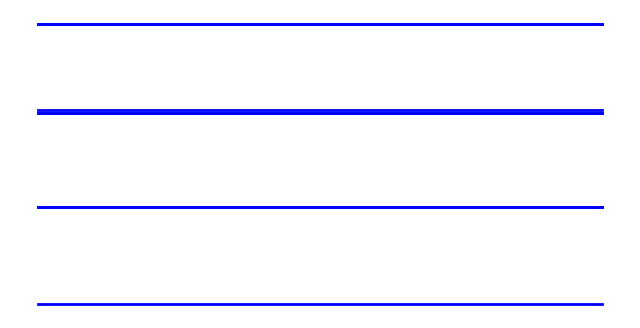

In [546]:
qt.plot_energy_levels([H], N=8, figsize=(8, 4));

In [561]:
first_transition = ee[1]-ee[0] # in units of Hertz
# print this frequency in GHz units
print("%.3f GHz"%((first_transition)/1e9))
print("%.3f GHz"%((ee[2]-ee[0])/1e9))

4.902 GHz
4.915 GHz


In [566]:
# H is the Hamiltonian
H,a_m_list = cir.hamiltonian(modes = [0,1],taylor = 4,excitations = [5,5], Lj = 8e-9,
    return_ops = True)  # with this, we return the annihilation operators of
                        # the different modes in addition to the Hamiltonian

# The Hamiltonian should be in angular frequencies for time-dependant simulations
H = 2.*np.pi*H

k = cir.loss_rates(Lj = 8e-9) # Calculate loss rates of the different modes

# c_ops are the collapse operators
# which should be in angular frequencies for time-dependant simulations
c_ops = [np.sqrt(2*np.pi*k[0])*a_m_list[0],np.sqrt(2*np.pi*k[1])*a_m_list[1]]

In [564]:
cir.eigenfrequencies(Lj = 8e-9)

array([5.07367184e+09, 5.09128655e+09])

In [565]:
cir.anharmonicities(Lj = 8e-9)

array([78741601.94114739, 82942573.2486983 ])

In [551]:
cir.anharmonicities(Lj = 8e-9)/cir.eigenfrequencies(Lj = 8e-9)

array([0.01551965, 0.01629108])

In [552]:
K = cir.kerr(Lj = 8e-9)
print("%.2f kHz"%(K[0,1]/1e3))

161629.59 kHz


In [553]:
A = cir.anharmonicities(Lj = 8e-9)
print("%.2f kHz"%(2*np.sqrt(A[0]*A[1])/1e3))

161629.59 kHz


In [554]:
cir.loss_rates(Lj = 8e-9)

array([9.94718394e+06, 4.83172008e+08])

In [555]:
T_1 = 1/cir.loss_rates(Lj = 8e-9)/2/np.pi
print(T_1)

[1.60000000e-08 3.29396034e-10]


In [556]:
cir.f_k_A_chi(pretty_print=False,Lj = 8e-9)

(array([5.07367184e+09, 5.09128655e+09]),
 array([9.94718394e+06, 4.83172008e+08]),
 array([78741601.94114739, 82942573.2486983 ]),
 array([[7.87416019e+07, 1.61629590e+08],
        [1.61629590e+08, 8.29425732e+07]]))

In [557]:
f,k,A,chi = cir.f_k_A_chi(pretty_print=True,Lj = 8e-9)

         mode |       freq.  |       diss.  |       anha.  |
            0 |     5.07 GHz |     9.95 MHz |     78.7 MHz |
            1 |     5.09 GHz |      483 MHz |     82.9 MHz |

Kerr coefficients (diagonal = Kerr, off-diagonal = cross-Kerr)
         mode |         0    |         1    |
            0 |     78.7 MHz |              |
            1 |      162 MHz |     82.9 MHz |



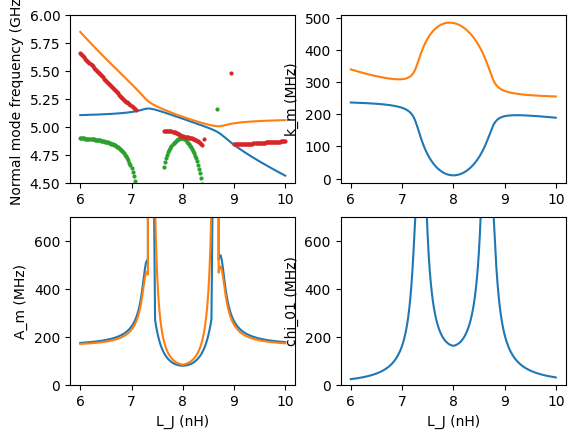

In [506]:
# array of values for the josephson inductance
Lj_list = np.linspace(6e-9,10e-9,201)

# Parameters of the system:
freqs, k_var, A_var, chi_var = cir.f_k_A_chi(Lj=Lj_list)

# Hamiltonian eigenenergies
H_freqs = np.array([((cir.hamiltonian(
    modes = [0,1],
    taylor = 4,
    excitations = 10,
    Lj = i)).eigenenergies())[0:3] for i in Lj_list])

fig, ax = plt.subplots(2,2)

ax[0,0].plot(Lj_list*1e9,freqs[0]/1e9)
ax[0,0].plot(Lj_list*1e9,freqs[1]/1e9)
ax[0,0].plot(Lj_list*1e9,(H_freqs[:,1] - H_freqs[:,0])/1e9, 'o', ms=2)
ax[0,0].plot(Lj_list*1e9,(H_freqs[:,2] - H_freqs[:,0])/1e9, 'o', ms=2)
ax[0,0].set_ylabel('Normal mode frequency (GHz)')
ax[0,0].set(ylim=(4.5,6))

ax[0,1].plot(Lj_list*1e9,k_var[0]/1e6)
ax[0,1].plot(Lj_list*1e9,k_var[1]/1e6)
ax[0,1].set_ylabel('k_m (MHz)')

ax[1,0].plot(Lj_list*1e9,A_var[0]/1e6)
ax[1,0].plot(Lj_list*1e9,A_var[1]/1e6)
ax[1,0].set_xlabel('L_J (nH)')
ax[1,0].set_ylabel('A_m (MHz)')
ax[1,0].set(ylim=(0,700))

ax[1,1].plot(Lj_list*1e9,chi_var[0,1]/1e6)
ax[1,1].set_xlabel('L_J (nH)')
ax[1,1].set_ylabel('chi_01 (MHz)')
ax[1,1].set(ylim=(0,700))


# show the figure
plt.show()

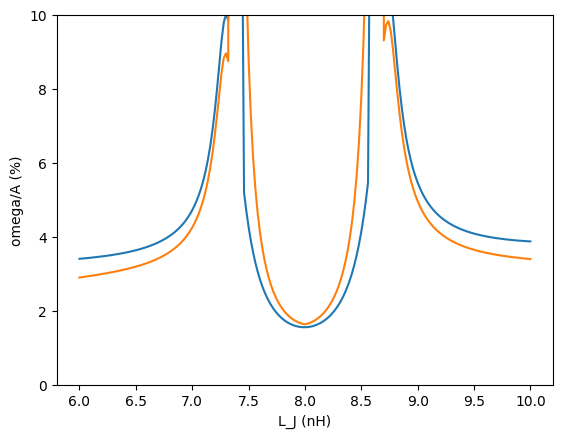

In [507]:
fig, ax = plt.subplots()

ax.plot(Lj_list*1e9,A_var[0]/freqs[0]*100)
ax.plot(Lj_list*1e9,A_var[1]/freqs[1]*100)
ax.set_ylabel('omega/A (%)')
ax.set_xlabel('L_J (nH)')
ax.set(ylim=(0,10))

plt.show()

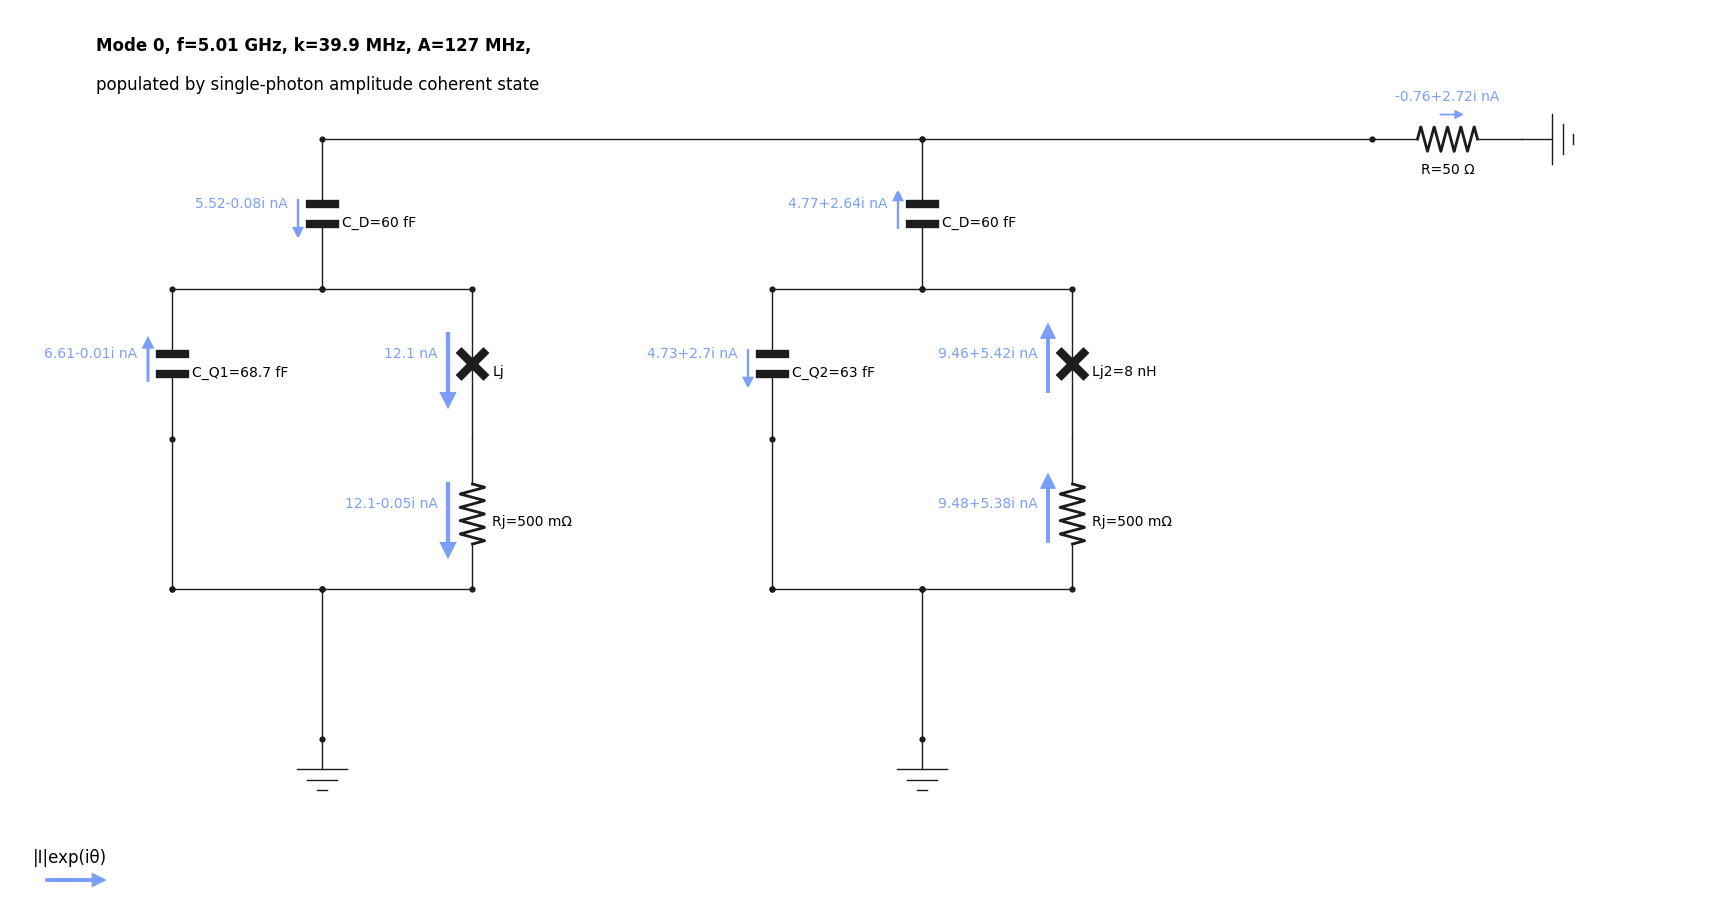

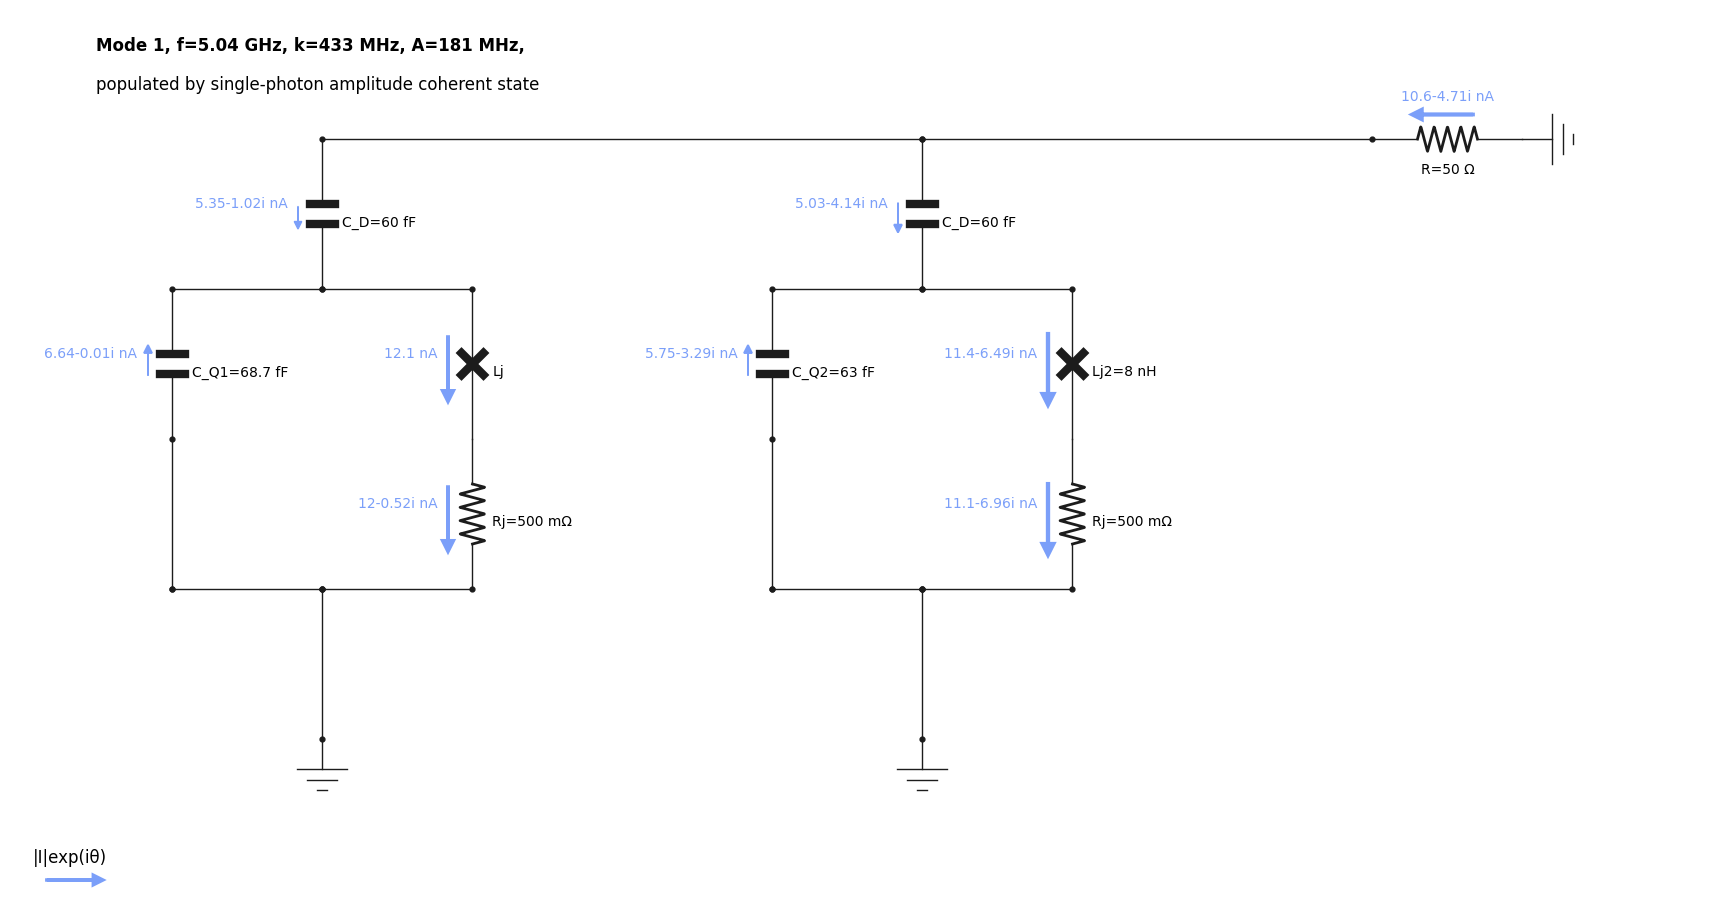

In [415]:
cir.show_normal_mode(mode=0,quantity='current', Lj = 8e-9)
cir.show_normal_mode(mode=1,quantity='current', Lj = 8e-9)